## Notebook vorbereiten

In [1]:
import urllib.request
import pandas as pd

## Daten beziehen und speichern

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7f1d440fd040>)

## In einen Dataframe laden

In [3]:
checkouts_df = pd.read_csv(checkout_file)

In [4]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,AUDIOBOOK,2018,1,1,Cooking for Picasso: A Novel (unabridged) (Una...,Camille Aubray,"Fiction, Historical Fiction, Literature",Books on Tape,2016
9996,Digital,OverDrive,EBOOK,2018,1,1,The Book of Summer: A Novel,Michelle Gable,"Fiction, Historical Fiction, Literature",Macmillan Publishers,2017
9997,Physical,Horizon,BOOK,2018,1,1,Revival / Stephen King.,"King, Stephen, 1947-","Drug addicts Fiction, Clergy Fiction, Rock mus...","Thorndike Press,",2014.
9998,Physical,Horizon,BOOK,2018,1,4,Loula is leaving for Africa / written and illu...,"Villeneuve, Anne, 1966-","Imagination Juvenile fiction, Chauffeurs Juven...","Kids Can Press,",[2013]


## Analysieren

In [11]:
# Allgemeine Durchschnittswerte
mean_df = checkouts_df.mean()
print(mean_df)

checkoutyear     2018.0000
checkoutmonth       1.0427
checkouts           3.3390
dtype: float64


In [12]:
# Kreuztabelle
pd.crosstab(index=checkouts_df['publicationyear'], columns=checkouts_df['checkouts'])

checkouts,1,2,3,4,5,6,7,8,9,10,...,84,85,89,95,105,106,114,176,495,540
publicationyear,,,,,,,,,,,,,,,,,,,,,
1888.,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1910.,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1911.,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1921.,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1926.,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
©2017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
©2017.,0,0,0,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
℗1995.,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
checkouts_df["materialtype"].value_counts()

BOOK                    4284
EBOOK                   2088
AUDIOBOOK                861
SOUNDDISC                839
VIDEODISC                806
SONG                     693
MUSIC                    134
MOVIE                     95
TELEVISION                81
COMIC                     60
MAGAZINE                  10
SOUNDDISC, VIDEODISC      10
SOUNDREC                   8
REGPRINT                   7
VIDEO                      5
CR                         4
ER                         3
MAP                        3
ER, SOUNDDISC              3
ATLAS                      2
VIDEOCASS, VIDEODISC       1
LARGEPRINT                 1
SOUNDCASS                  1
ER, VIDEODISC              1
Name: materialtype, dtype: int64

In [19]:
# Welche Materialien werden am häufigsten ausgeliehen?
top5 = checkouts_df.materialtype.value_counts().head(5)
top5

BOOK         4284
EBOOK        2088
AUDIOBOOK     861
SOUNDDISC     839
VIDEODISC     806
Name: materialtype, dtype: int64

In [20]:
%matplotlib inline

<AxesSubplot:>

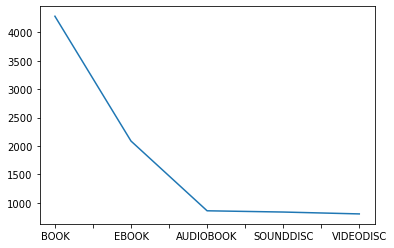

In [21]:
top5.plot()

<AxesSubplot:>

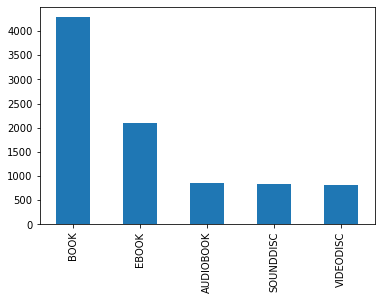

In [22]:
top5.plot.bar()

<AxesSubplot:ylabel='materialtype'>

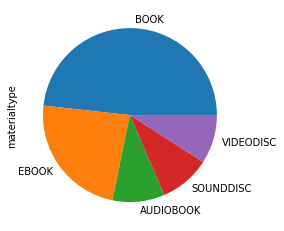

In [23]:
top5.plot.pie()

In [25]:
# Verschie bt sich das Bild, wenn man alle Materialtypen berücksichtigt?
allmaterial = checkouts_df.materialtype.value_counts()
allmaterial

BOOK                    4284
EBOOK                   2088
AUDIOBOOK                861
SOUNDDISC                839
VIDEODISC                806
SONG                     693
MUSIC                    134
MOVIE                     95
TELEVISION                81
COMIC                     60
MAGAZINE                  10
SOUNDDISC, VIDEODISC      10
SOUNDREC                   8
REGPRINT                   7
VIDEO                      5
CR                         4
ER                         3
MAP                        3
ER, SOUNDDISC              3
ATLAS                      2
VIDEOCASS, VIDEODISC       1
LARGEPRINT                 1
SOUNDCASS                  1
ER, VIDEODISC              1
Name: materialtype, dtype: int64

<AxesSubplot:ylabel='materialtype'>

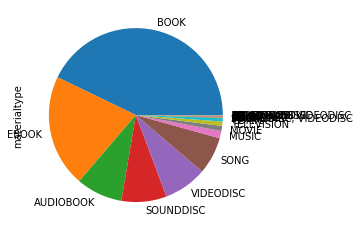

In [26]:
allmaterial.plot.pie()

In [27]:
# Welche Materialien werden am seltensten ausgeliehen?
loser5 = checkouts_df.materialtype.value_counts().tail(5)
loser5

ATLAS                   2
VIDEOCASS, VIDEODISC    1
LARGEPRINT              1
SOUNDCASS               1
ER, VIDEODISC           1
Name: materialtype, dtype: int64

In [30]:
pd.crosstab(index=checkouts_df['materialtyp'], columns=checkouts_df['usageclass'])

KeyError: 'materialtyp'